# Data Transform

In this notebook, we will ask you a series of questions to evaluate your findings from your EDA. Based on your response & justification, we will ask you to also apply a subsequent data transformation. 

If you state that you will not apply any data transformations for this step, you must **justify** as to why your dataset/machine-learning does not require the mentioned data preprocessing step.

The bonus step is completely optional, but if you provide a sufficient feature engineering step in this project we will add `1000` points to your Kahoot leaderboard score.

You will write out this transformed dataframe as a `.csv` file to your `data/` folder.

**Note**: Again, note that this dataset is quite large. If you find that some data operations take too long to complete on your machine, simply use the `sample()` method to transform a subset of your data.

In [38]:
import pandas as pd
import numpy as np

In [39]:
# load the data into the notebook
transactions = pd.read_csv("../data/bank_transactions.csv")

#check for null values within the dataset
transactions.isnull().sum()


type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Q1

Does your model contain any missing values or "non-predictive" columns? If so, which adjustments should you take to ensure that your model has good predictive capabilities? Apply your data transformations (if any) in the code-block below.

The dataset does not contain any missing values. However, it does include several non-predictive columns. The nameOrig and nameDest columns are unique identifies that do not aid in predicting fraudulent activity. There is also no need to keep isFlaggedFraud as it relates to the target variable of "isFraud".

In [40]:
# Drop non-predictive columns
transactions_transformed = transactions.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

## Q2

Do certain transaction types consistently differ in amount of fraud likelihood? If so, how might you transform the type column to make this pattern usable by a machine learning model? Apply your data transformations (if any) in the code-block below.

From the EDA, it was observed that fraud is only present in TRANSFER and CASH_OUT transaction types. The other transaction types had no incidence of fraud. To make the model learn this pattern, the type column will need to be transformed using one-hot-encoding, turning the column's categorical values into binary numeric values. 

In [ ]:
# One-hot encode the 'type' column
transactions_transformed = pd.get_dummies(transactions_transformed, columns=['type'])


In [44]:
# Making a new column to explore the difference in the original oldbalance and newbalance as well as the destination new & old balance.
# Then compare that difference to the "amount" in the transaction
# This might reveal some patterns in terms of what CASH_OUTs and TRANSFERS are fraudulent

# Difference in balance for sender
transactions_transformed['orig_diff'] = transactions_transformed['oldbalanceOrg'] - transactions_transformed['newbalanceOrig']

# Difference in balance for receiver
transactions_transformed['dest_diff'] = transactions_transformed['newbalanceDest'] - transactions_transformed['oldbalanceDest']

# Check if the difference matches the "amount"
transactions_transformed['orig_error'] = transactions_transformed['orig_diff'] - transactions_transformed['amount']
transactions_transformed['dest_error'] = transactions_transformed['dest_diff'] - transactions_transformed['amount']

In [55]:
# examining these new columns
import seaborn as sns
import matplotlib.pyplot as plt

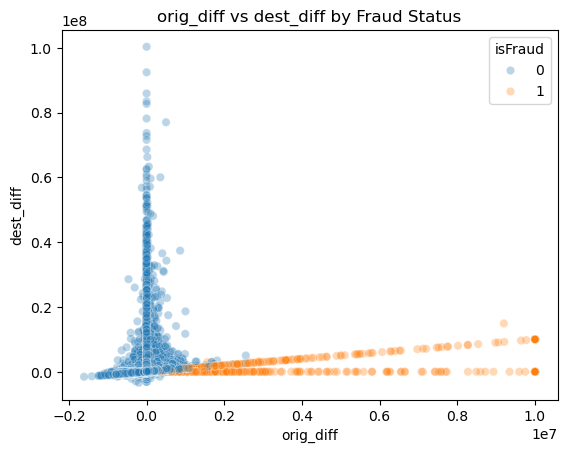

In [54]:
# Looking at the relationship between orig_diff and dest_diff

sns.scatterplot(data=transactions_transformed, x='orig_diff', y='dest_diff', hue='isFraud', alpha=0.3)
plt.title('orig_diff vs dest_diff by Fraud Status')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

From this scatterplot, specifically looking at the straight diagonal formed by the isFraud data points, it appears that when funds are removed from the sender's account (orig_diff), the exact amount is moved to the receiver's account (dest_diff). This aligns with the earlier observation that the TRANSFER transaction type had a significant amount of fraudulent activity. 

In [45]:
# Save transformed data into CSV
transactions_transformed.to_csv('../data/transactions_transformed.csv', index=False)

## Q3

After exploring your data, you may have noticed that fraudulent transactions are rare compared to non-fraudulent ones. What challenges might this pose when training a machine learning model? What strategies could you use to ensure your model learns meaningful patterns from the minority class? Apply your data transformations (if any) in the code-block below.

There is a significant class imbalance due to the fact that fraudulent activity is rare (making up less than 1% of the total data). This could lead to a model that performs well in accuracy but fails to correctly identify fraudulent transactions. To address this issue, I can either perform resampling of the data (undersampling the majority class/ oversampling the minority "isFraud" class) or I could perform SMOTE (Synthtic Minority Oversampling Technique). The last thing that could be done to balance out the classes is to adjust the class weights so that the model will be penalized for misclassifying the minority class (using class_weight="balanced"). In this case, I will utilize SMOTE.

In [ ]:
# SMOTE 
from imblearn.over_sampling import SMOTE

X = transactions_transformed.drop(columns=['isFraud'])
# Set target var
y = transactions_transformed['isFraud']

# Perform SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

## Bonus (optional)

Are there interaction effects between variables (e.g., fraud and high amount and transaction type) that aren't captured directly in the dataset? Would it be helpful to manually engineer any new features that reflect these interactions? Apply your data transformations (if any) in the code-block below.

Answer Here

In [42]:
# write out newly transformed dataset to your folder
...